<a href="https://colab.research.google.com/github/evmpython/CAT010_UNIFEI_2025/blob/main/CAT010_Aula_02_classificacao_de_nuvens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


#  🟢 **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---






## **Aula Prática 2:** $\underline{Realizando\ Classificação\ de\ Nuvens}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como realizar a classificação de nuvens usando dados do canal visível e infravermelho. Para isto usaremos os dados do sensor [Advanced Baseline Imager (ABI)](https://space.oscar.wmo.int/instruments/view/abi) do satélite [Geostationary Operational Environmental Satellite (GOES-16)](https://space.oscar.wmo.int/satellites/view/goes_16).

---


**DADOS DE ENTRADA**: Arquivos de temperatura de brilho dos canais **visível** e **infravermelho**

1. $\underline{Visível}$: CH02 - 0.64 µm
- **Tipo do dado:** matriz de 6262 linhas x 6262 colunas  
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** S10635334_202001231200.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/)

    ----------

2. $\underline{Infravermelho}$: CH13 - 10.35 µm
- **Tipo do dado:** matriz de 3131 linhas x 3131 colunas  
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** S10635346_202001231200.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/)

---

**DADOS DE SAÍDA:**
- **Tipo do dado:** Figuras
- **Formato do dado:** arquivos PNG
- **Imagens geradas:**
    1. Fig_1_vis_ir.png
    2. Fig_2_vis_ir_recorte.png
    3. Fig_3_dispersao_TxR.png

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Download dos arquivos auxiliares
3.   Monta o google drive
4.   Define o caminho do google drive
5.   Importação das bibliotecas
6.   Baixa os dados de satélite
7.   Plota as imagens da **América do Sul** do visível e infravermelho em forma de painel
8.   Plota as imagens da **área de recorte** do visível e infravermelho em forma de painel
9.  Plota gráfico de dispersão de temperatura versus refletância


---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive
    - 2. Escolha a data da sua imagem de satélite
    - 3. Altere os limites da área de recorte

---
- **Realizado por:** Enrique V. Mattos - 23/08/2022
- **Atualizado por:** Enrique V. Mattos - 13/08/2025


---

# **1° Passo:** Instalando as bibliotecas

In [1]:
!pip install -q ultraplot cartopy boto3 rasterio pyproj geopandas salem descartes boto3 gdal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.0 MB/s eta 0:00:00


# **2° Passo:** Download de Arquivos Auxiliares


Neste passo vamos baixar alguns arquivos auxiliares necessários para a nossa aula:

*   **utilities_goes16.py:** Script com algumas funções para processamento de dados de satélite
*   **ir.cpt:** Paleta de cores para canais infravermelhos do GOES-16
*   **vis.cpt:** Paleta de cores para o canal do visível do GOES-16
*   **wv.cpt:** Paleta de cores para o canal do vapor d'água do GOES-16

In [2]:
# baixando o arquivo utilities.py
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/utilities_goes16.py

# baixando a paletas de cores do infravermelho, visível e vapor d'água
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/ir.cpt
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/vis.cpt
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/wv.cpt

--2025-08-13 21:37:10--  https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/utilities_goes16.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2025/main/utils/utilities_goes16.py [following]
--2025-08-13 21:37:10--  https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2025/main/utils/utilities_goes16.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17330 (17K) [text/plain]
Saving to: ‘utilities_goes16.py’

utilities_goes16.py 100%[===================>]  16.92K  --.-KB/s    in 0s      

2025-08-13 21:37:10 (87.4 MB/s) - ‘utilities_goes16.py’ saved [1733

# **3° Passo:** Montando Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4° Passo:** Caminho do Diretório - **### >>> MUDANÇAS AQUI <<< ###**

- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [4]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_02_CLASSIFICACAO_DE_NUVENS/'

- **Criando a pasta de saída ("output")**

In [5]:
import os
os.makedirs(f'{dir}output', exist_ok=True)

# **5° Passo:** Importando as Bibliotecas

In [6]:
# Computação Científica Básica
import numpy as np               # Biblioteca fundamental para cálculos com arrays e álgebra linear
import pandas as pd              # Ferramenta para análise e manipulação de dados tabulares
import xarray as xr              # Manipulação de arrays multidimensionais com rótulos (netCDF, HDF5)

# Visualização de Dados
import matplotlib.pyplot as plt  # Biblioteca principal para criação de gráficos 2D
from matplotlib.colors import LinearSegmentedColormap  # Criação de mapas de cores personalizados
from matplotlib import cm        # Mapas de cores pré-definidos e utilitários de cor
import ultraplot as uplt         # Plotagem avançada para dados meteorológicos/geoespaciais

# Geoprocessamento e Mapas
import cartopy.crs as ccrs       # Sistemas de referência de coordenadas para dados geoespaciais
import cartopy.io.shapereader as shpreader  # Leitura de arquivos shapefile geográficos

# Sistema e Utilitários
import os                        # Interface com o sistema operacional (operações com arquivos/pastas)
import time                      # Funções para medição e controle de tempo
from utilities_goes16 import loadCPT  # Utilitário personalizado para carregar mapas de cores (arquivos CPT) do GOES-16

# Controle de Avisos
import warnings                  # Controle de mensagens de aviso
warnings.filterwarnings("ignore")  # Suprime mensagens de aviso durante a execução

/usr/local/lib/python3.11/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


# **PARTE 1)**: Baixando os Dados de Satélite









---


- Nesta etapa da nossa aula iremos baixar os dados brutos de satélite direto da fonte. Assim, o primeiro passo será baixar os dados de satélite para os canais `visível` e `infravermelho` para uma determinada data.
- Esses dados são fornecidos pela NOAA e reprocessados pela [Divisão de Satélites (DSA)](http://satelite.cptec.inpe.br/home/index.jsp) do CPTEC/INPE e estão disponíveis no [ftp](http://ftp.cptec.inpe.br/goes/goes16/retangular/) do INPE. Abaixo seguem informações sobres esses 3 canais:



---

1. [Visível](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/): CH02 - 0.64 µm
2. [Infravermelho](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/): CH13 - 10.35 µm


Abaixo precisaremos definir o **ano**, **mês**, **dia**, **hora** e **minuto** do dado que gostaríamos de gerar a imagem de satélite. **Lembre-se**: os dados do sensor **ABI** do satélite **GOES-16** possui resolução temporal de 10 min. Por exemplo: 00:00, 00:10, 00:20, ... No exemplo a seguir iremos baixar e gerar a imagem do dia **1 de janeiro de 2021 às 17 horas e 0 minutos**.

In [7]:
# Defina a data/horário da imagem e o satélite
ano, mes, dia, hor, min = '2021', '01', '01', '17', '00'

In [8]:
# Endereço do FTP do CPTEC-INPE
ftp_cptec = 'http://ftp.cptec.inpe.br/goes/'

In [9]:
# Montando os nomes dos arquivos. É o caminho onde estão os dados no FTP do INPE.
file_vis = f'{ftp_cptec}goes16/retangular/ch02/{ano}/{mes}/S10635334_{ano}{mes}{dia}{hor}{min}.nc'
file_ir =  f'{ftp_cptec}goes16/retangular/ch13/{ano}/{mes}/S10635346_{ano}{mes}{dia}{hor}{min}.nc'

print(file_vis)
print(file_ir)

http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/2021/01/S10635334_202101011700.nc
http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2021/01/S10635346_202101011700.nc


In [10]:
# Download dos arquivos
!wget -c {file_vis}
!wget -c {file_ir}

--2025-08-13 21:39:29--  http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/2021/01/S10635334_202101011700.nc
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.178.56
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.178.56|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/2021/01/S10635334_202101011700.nc [following]
--2025-08-13 21:39:29--  https://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/2021/01/S10635334_202101011700.nc
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.178.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60528652 (58M) [application/x-netcdf]
Saving to: ‘S10635334_202101011700.nc’

S10635334_202101011 100%[===================>]  57.72M  6.14MB/s    in 6.8s    

2025-08-13 21:39:36 (8.46 MB/s) - ‘S10635334_202101011700.nc’ saved [60528652/60528652]

--2025-08-13 21:39:37--  http://ftp.cptec.inpe.br/goes/goes16/r

# **PARTE 2)**: Plota Imagens em Forma de Painel: `Área Total`


Nesta etapa plotaremos numa única figura a imagem do infravermelho e visível.

- **Leitura dos dados**

In [11]:
# leitura da imagem do infravermelho
imagem_ir = xr.open_dataset(f'/content/S10635346_{ano}{mes}{dia}{hor}{min}.nc')

In [12]:
# leitura da imagem do visível
imagem_vis = xr.open_dataset(f'/content/S10635334_{ano}{mes}{dia}{hor}{min}.nc')

In [13]:
# mostra os dados do canal infravermelho: temperatura
imagem_ir

<xarray.Dataset> Size: 78MB
Dimensions:  (lat: 3131, lon: 3131)
Coordinates:
  * lat      (lat) float64 25kB -55.99 -55.96 -55.93 -55.9 ... 34.93 34.96 34.99
  * lon      (lon) float64 25kB -116.0 -116.0 -115.9 ... -25.07 -25.04 -25.01
Data variables:
    Band1    (lat, lon) float64 78MB ...
    crs      |S1 1B ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 2.2.2, released 2017/09/15
    history:      Fri Jan 01 21:27:17 2021: GDAL Create( /dados/output/goes16...

In [14]:
# mostra os dados do canal visível: refletância
imagem_vis

<xarray.Dataset> Size: 314MB
Dimensions:  (lat: 6262, lon: 6262)
Coordinates:
  * lat      (lat) float64 50kB -55.99 -55.98 -55.96 ... 34.96 34.98 34.99
  * lon      (lon) float64 50kB -116.0 -116.0 -116.0 ... -25.04 -25.02 -25.01
Data variables:
    Band1    (lat, lon) float64 314MB ...
    crs      |S1 1B ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 2.2.2, released 2017/09/15
    history:      Sat Jan 02 01:38:04 2021: GDAL Create( /dados/output/goes16...

- **Organiza os dados**

In [15]:
imagem_ir['Band1'].values

array([[26353., 26353., 26390., ..., 23126., 23071., 23071.],
       [26439., 26439., 26353., ..., 23243., 23108., 23108.],
       [26599., 26525., 26525., ..., 23108., 23090., 23090.],
       ...,
       [27877., 28080., 28239., ..., 26863., 26857., 27072.],
       [28123., 28153., 28209., ..., 26746., 26918., 26826.],
       [28233., 28233., 28153., ..., 26949., 26949., 26980.]])

In [16]:
imagem_vis['Band1'].values

array([[2615., 2615., 2457., ..., 3628., 3549., 3549.],
       [2895., 3117., 3117., ..., 3701., 3644., 3644.],
       [2606., 2450., 2450., ..., 3822., 3720., 3720.],
       ...,
       [1336., 1269., 1333., ..., 1257., 1511., 1511.],
       [1206., 1409., 1282., ..., 1425., 1561., 1561.],
       [1114., 1133., 1320., ..., 1796., 1726., 1615.]])

Os dados do infravermelho estão no formato de temperatura de brilho.

In [17]:
# divide os dados do infravermelho por 100 e transforma os dados de Kelvin para Celsius
imagem_ir = (imagem_ir['Band1']/100.)-273.15

Os dados do visível estão no formato de refletância.

In [18]:
# divide os dados do visível por 100
imagem_vis = (imagem_vis['Band1']/100.)

- **Define o limite geral da imagem e do recorte**

In [19]:
# limites da imagem geral
lonmin, lonmax, latmin, latmax = float(imagem_ir['lon'][0]), float(imagem_ir['lon'][-1]), float(imagem_ir['lat'][0]), float(imagem_ir['lat'][-1])

In [20]:
# limites da área de recorte
lonmin_rec, lonmax_rec, latmin_rec, latmax_rec = -40, -35, -30, -25

- **Plota imagem**

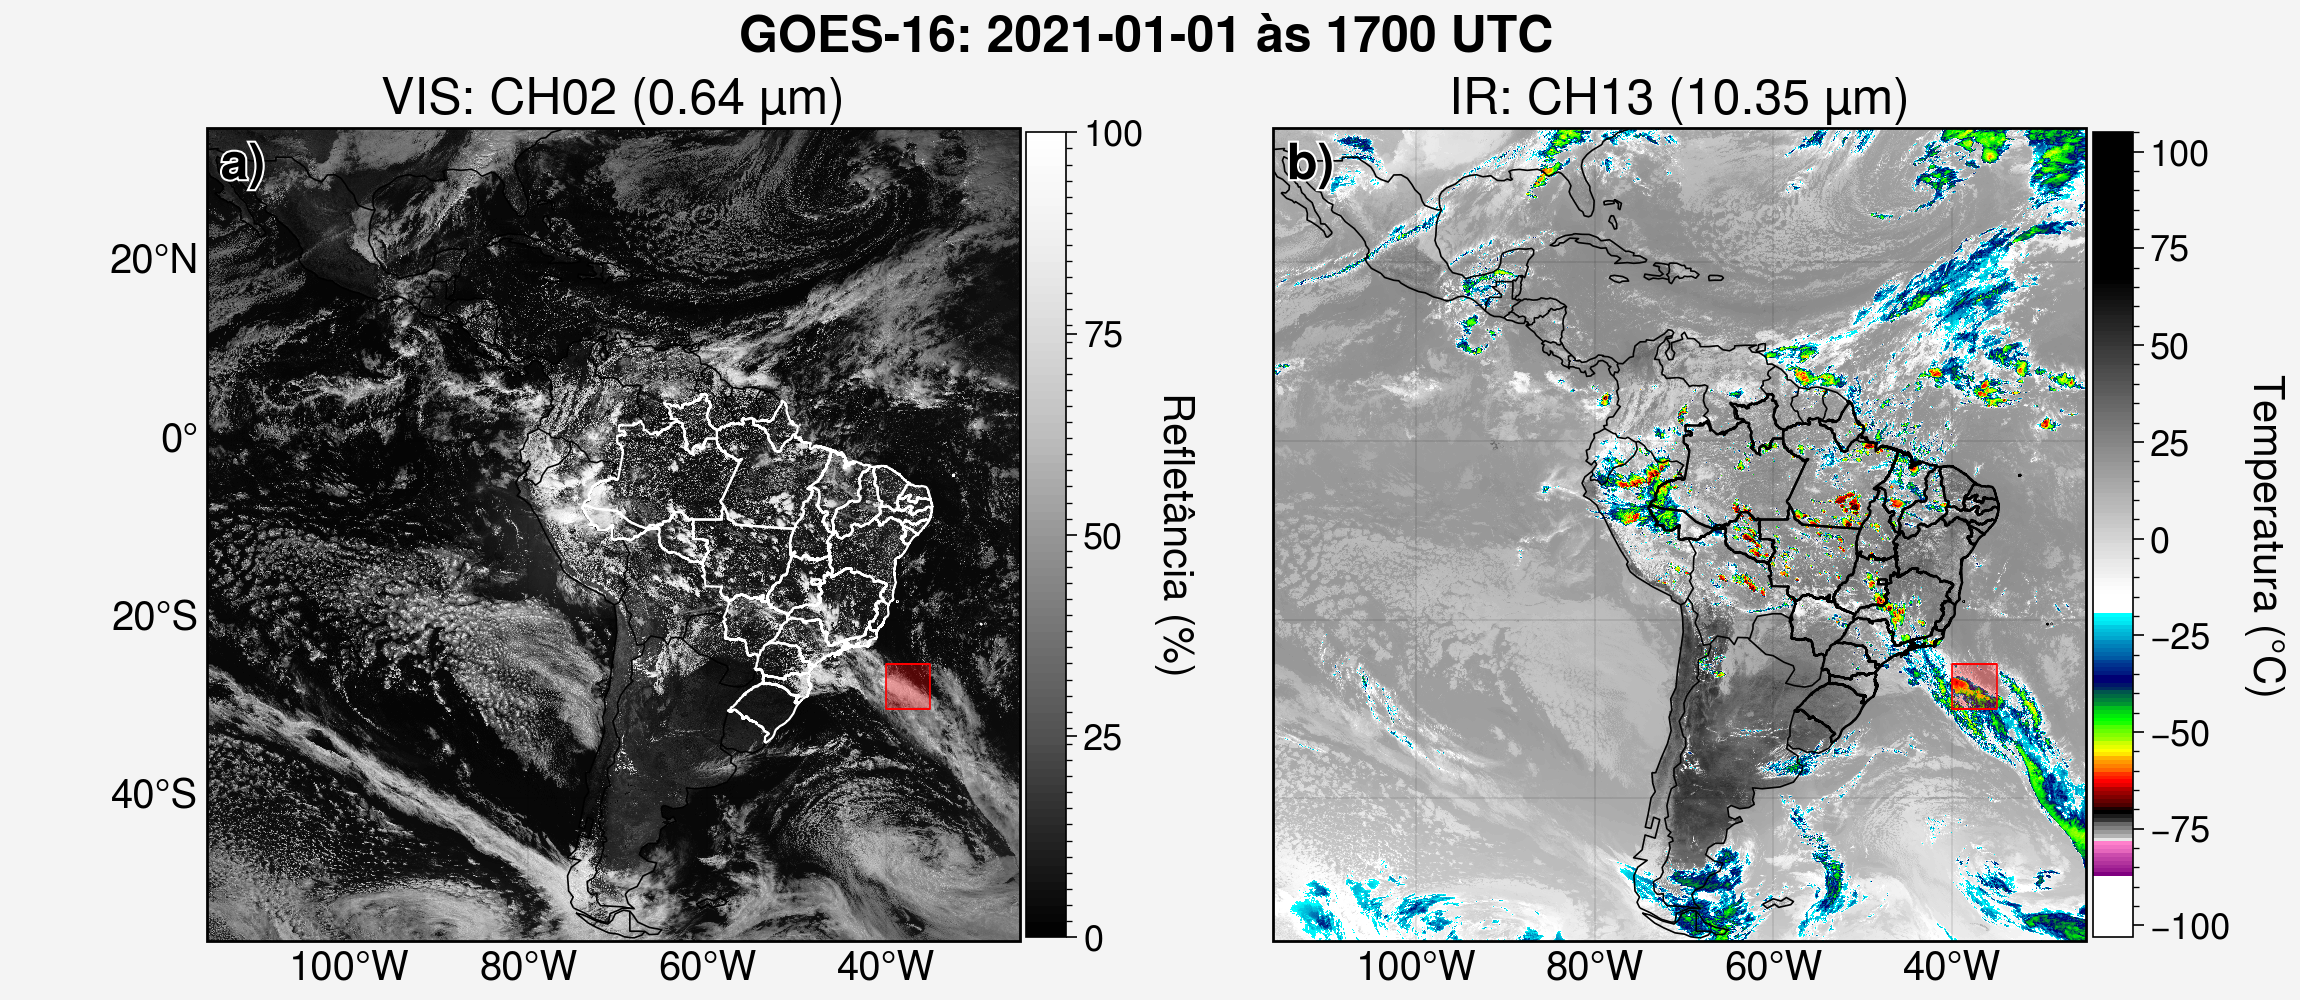

CPU times: user 31.5 s, sys: 5.15 s, total: 36.6 s
Wall time: 37.7 s


In [23]:
%%time
#=================================================================================#
#                           DEFINIÇÕES DO GRÁFICO
#=================================================================================#
# cria a moldura da figura
fig, ax = uplt.subplots(ncols=2, nrows=1, figsize=(11.5,5), proj='pcarree', tight=True)

# formatação dos eixos
ax.format(coast=True, borders=True, innerborders=False,
          labels=False,
          latlines=20, lonlines=20,
          latlim=(latmin, latmax),
          lonlim=(lonmin, lonmax),
          suptitle=f'GOES-16: {ano}-{mes}-{dia} às {hor}{min} UTC',
          abc=True, abcstyle='a)', abcsize=5, abcloc = 'ul',
          small='20px', large='25px')

# define qual eixo terá os labels de latitudes e longitudes
ax[0].format(labels = [True, False, True, False])
ax[1].format(labels = [False, False, True, False])

#=================================================================================#
#                        FIGURA A): VISÍVEL
#=================================================================================#
# plota mapa
map1 = ax[0].imshow(np.flipud(imagem_vis),
             cmap='Greys_r',
             extent=[lonmin, lonmax, latmin, latmax],
             levels=uplt.arange(0, 100, 1.0))

# plota quadrado na figura
ax[0].fill_between((lonmin_rec, lonmax_rec), *(latmin_rec, latmax_rec), zorder=3, edgecolor='red', facecolor=uplt.set_alpha('red', 0.3))

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=0.8, zorder=2)

# plota titulo de cada figura
ax[0].format(title='VIS: CH02 (0.64 µm)', linewidth=1)

# plota barra de cores da figura
ax[0].colorbar(map1, loc='r', label='Refletância (%)', ticks=25, ticklabelsize=13, labelsize=15, length=0.99, space=-8.0)

#=================================================================================#
#                        FIGURA B): INFRAVERMELHO
#=================================================================================#
# converte o arquivo CPT para ser usado em Python
cpt = loadCPT('ir.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# plota mapa
map2 =  ax[1].imshow(np.flipud(imagem_ir),
                    cmap=colormap,
                    extent=[lonmin, lonmax, latmin, latmax],
                    levels=uplt.arange(-103.0, 105, 1.0))

# plota quadrado na figura
ax[1].fill_between((lonmin_rec, lonmax_rec), *(latmin_rec, latmax_rec), zorder=3, edgecolor='red', facecolor=uplt.set_alpha('red', 0.3))

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

# plota titulo de cada figura
ax[1].format(title='IR: CH13 (10.35 µm)', linewidth=1)

# plota barra de cores da figura
ax[1].colorbar(map2, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, length=0.99, space=-8.0)

#=================================================================================#
#                            SALVA FIGURA
#=================================================================================#
# salva figura
fig.savefig(f'{dir}output/Fig_1_vis_ir.jpg', dpi=300)

# exibe a figura na tela
uplt.show()

# **PARTE 3)**: Plota Imagens em Forma de Painel: `Área do Recorte`

- **Recorta as imagens**

In [24]:
# lembrando a região da imagem de satélite que iremos focar na nossa análise
print('#-------------------- Limites de longitude --------------------#')
print('longitude miníma=', lonmin_rec)
print('longitude máxima=', lonmax_rec, '\n')

print('#-------------------- Limites de latitude --------------------#')
print('latitude mínima=', latmin_rec)
print('latitude máxima=', latmax_rec)

#-------------------- Limites de longitude --------------------#
longitude miníma= -40
longitude máxima= -35 

#-------------------- Limites de latitude --------------------#
latitude mínima= -30
latitude máxima= -25


In [25]:
# faz o recorte na imagem do infravermelho
imagem_ir_rec = imagem_ir.sel(lon=slice(lonmin_rec, lonmax_rec),
                              lat=slice(latmin_rec, latmax_rec))

In [26]:
# mostra os dados recortados do infravermelho
imagem_ir_rec

<xarray.DataArray 'Band1' (lat: 172, lon: 172)> Size: 237kB
array([[-37.15, -37.15, -37.95, ..., -32.36, -29.1 , -32.67],
       [-34.08, -32.54, -37.95, ..., -26.21, -24.25, -23.33],
       [-30.33, -28.43, -28.43, ..., -35.43, -30.27, -24.25],
       ...,
       [  0.39,   8.88,  12.44, ...,   2.18,   1.56,   5.74],
       [  5.86,  12.26,   8.94, ...,   3.71,   5.31,   6.42],
       [  4.02,  10.1 ,   6.85, ...,   6.48,   6.91,  10.6 ]])
Coordinates:
  * lat      (lat) float64 1kB -29.97 -29.94 -29.91 ... -25.06 -25.03 -25.0
  * lon      (lon) float64 1kB -39.98 -39.95 -39.92 ... -35.07 -35.04 -35.01

In [27]:
# faz o recorte na imagem do visível
imagem_vis_rec = imagem_vis.sel(lon=slice(lonmin_rec, lonmax_rec), lat=slice(latmin_rec, latmax_rec))

In [28]:
# mostra os dados recortados do visível
imagem_vis_rec

<xarray.DataArray 'Band1' (lat: 344, lon: 344)> Size: 947kB
array([[31.71, 30.28, 31.39, ..., 45.14, 45.14, 46.73],
       [32.15, 32.98, 31.65, ..., 45.42, 46.15, 47.46],
       [32.38, 31.49, 31.84, ..., 46.76, 47.61, 47.61],
       ...,
       [11.65, 13.33, 10.73, ...,  9.46,  9.58,  9.52],
       [12.53, 12.98, 10.34, ..., 10.09,  8.6 , 11.33],
       [13.17, 11.96,  6.98, ...,  7.99,  9.23,  7.74]])
Coordinates:
  * lat      (lat) float64 3kB -29.99 -29.98 -29.97 ... -25.04 -25.02 -25.01
  * lon      (lon) float64 3kB -39.99 -39.98 -39.96 ... -35.03 -35.02 -35.01

- **Plota a figura**

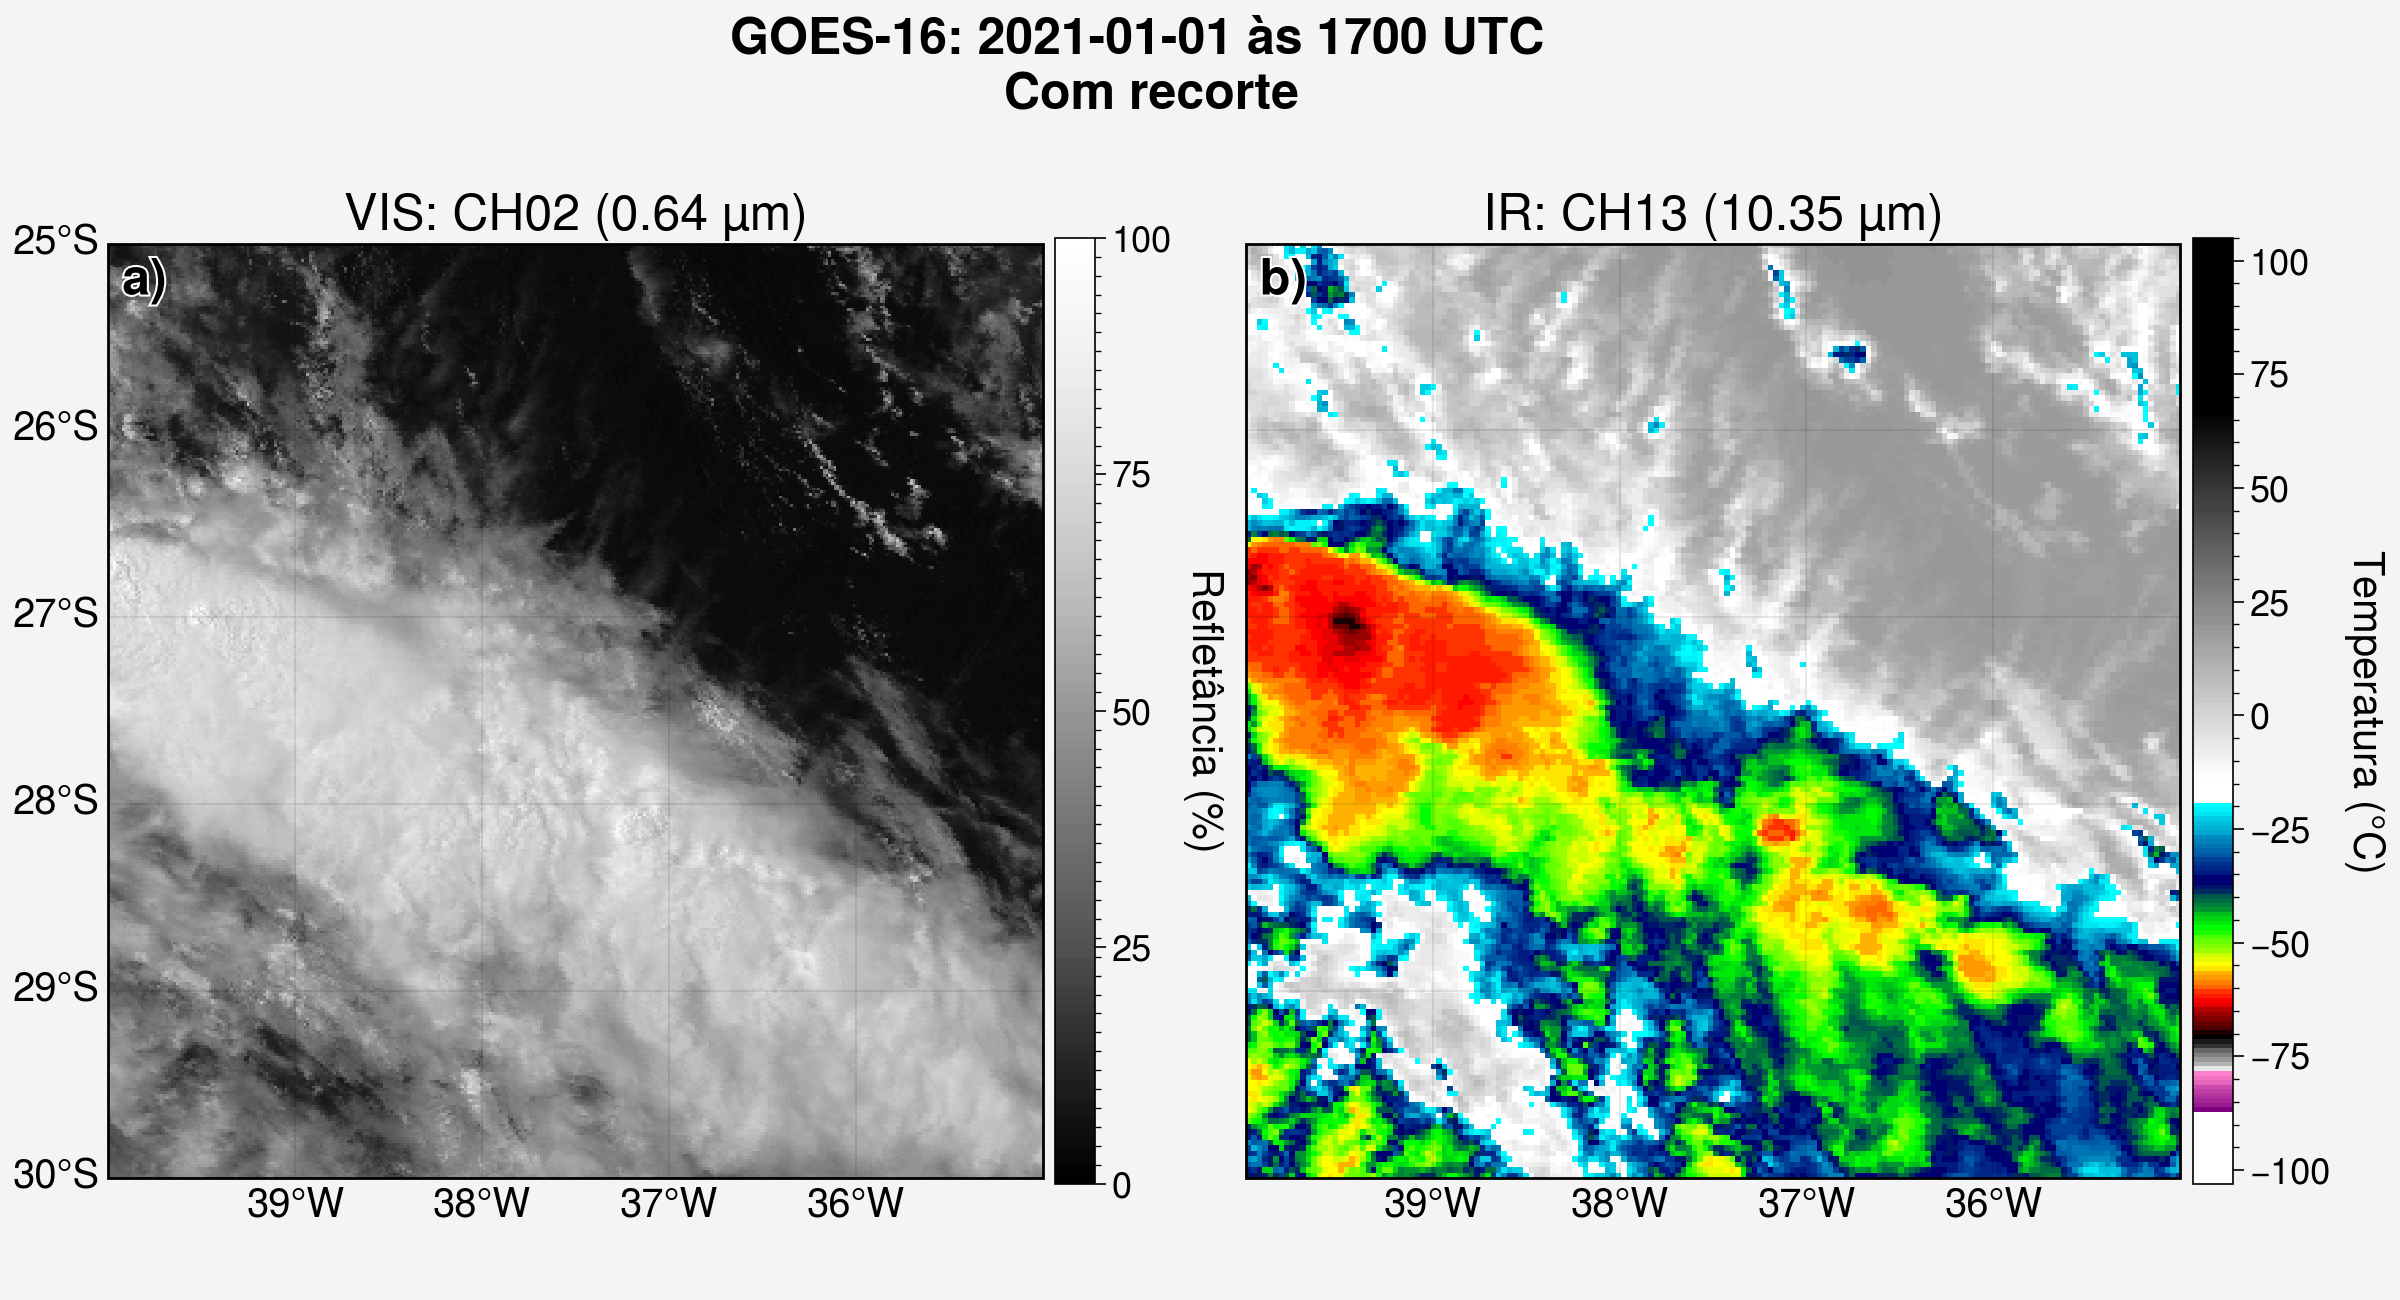

CPU times: user 20.8 s, sys: 197 ms, total: 21 s
Wall time: 22.4 s


In [29]:
%%time
#=================================================================================#
#                           DEFINIÇÕES DO GRÁFICO
#=================================================================================#
# cria a moldura da figura
fig, ax = uplt.subplots(ncols=2, nrows=1, figsize=(12,6.5), proj='pcarree', tight=True)

# formatação dos eixos
ax.format(coast=True, borders=True, innerborders=False,
          labels=False,
          latlim=(latmin_rec, latmax_rec),
          lonlim=(lonmin_rec, lonmax_rec),
          suptitle=f'GOES-16: {ano}-{mes}-{dia} às {hor}{min} UTC \n Com recorte',
          abc=True, abcstyle='a)', abcsize=5, abcloc = 'ul',
          small='20px', large='25px')

# define qual eixo terá os labels de latitudes e longitudes
ax[0].format(labels = [True, False, True, False])
ax[1].format(labels = [False, False, True, False])

#=================================================================================#
#                        FIGURA A): VISÍVEL
#=================================================================================#
# plota mapa
map1 = ax[0].imshow(np.flipud(imagem_vis_rec),
             cmap='Greys_r',
             extent=[lonmin_rec, lonmax_rec, latmin_rec, latmax_rec],
             levels=uplt.arange(0, 100, 1.0))

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=0.8, zorder=2)

# plota titulo de cada figura
ax[0].format(title='VIS: CH02 (0.64 µm)', linewidth=1)

# plota barra de cores da figura
ax[0].colorbar(map1, loc='r', label='Refletância (%)', ticks=25, ticklabelsize=13, labelsize=15, length=0.82)

#=================================================================================#
#                        FIGURA B): INFRAVERMELHO
#=================================================================================#
# carrega tabela de cores
cpt_ir = loadCPT('ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# plota mapa
map2 =  ax[1].imshow(np.flipud(imagem_ir_rec),
                     cmap=cmap_ir,
                     extent=[lonmin_rec, lonmax_rec, latmin_rec, latmax_rec],
                     levels=uplt.arange(-103.0, 105, 1.0))

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

# plota titulo de cada figura
ax[1].format(title='IR: CH13 (10.35 µm)', linewidth=1)

# plota barra de cores da figura
ax[1].colorbar(map2, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, length=0.82)

#=================================================================================#
#                            SALVA FIGURA
#=================================================================================#
# salva figura
fig.savefig(f'{dir}output/Fig_2_vis_ir_recorte.jpg', dpi=300)

# exibe a figura na tela
uplt.show()

# **PARTE 4)**: Plota Gráfico de Dispersão **Temperatura** versus **Refletância**

- **Faz a interpolação do canal visível**

In [30]:
# mostrando a quantidade de linhas e colunas da matriz de "refletância"
imagem_vis_rec.shape

(344, 344)

In [31]:
# mostrando a quantidade de linhas e colunas da matriz de "temperatura"
imagem_ir_rec.shape

(172, 172)

- Como queremos extrair o par de valores de **temperatura**-**refletância** pertencente a cada pixel, precisaremos antes colocar as matrizes de temperatura e refletância numa grade com a mesma resolução espacial.
- Para isto pegaremos a grade de refletância que possui 500 m e transformaremos numa grade de 2 km de resolução espacial.
- O [Xarray](https://docs.xarray.dev/en/stable/index.html) tem uma função chamada [**interp**](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.interp.html) que realiza o processo de interpolação de dados. Nessa função precisaremos informar as **latitudes e longitudes da nova grade** e o **método de interpolação**.

In [32]:
# consultando informações sobre a função "interp" do xarray
xr.DataArray.interp?

In [33]:
# faz a interpolação dos dados do visivel de 0.5 km para 2 km
imagem_vis_rec_new = imagem_vis_rec.interp(lat=imagem_ir_rec['lat'],
                                           lon=imagem_ir_rec['lon'],
                                           method='linear')

In [34]:
# mostra a matriz de latitude do visível que foi interpolada
imagem_vis_rec_new['lat']

<xarray.DataArray 'lat' (lat: 172)> Size: 1kB
array([-29.973012, -29.943948, -29.914883, -29.885819, -29.856755, -29.827691,
       -29.798627, -29.769562, -29.740498, -29.711434, -29.68237 , -29.653306,
       -29.624241, -29.595177, -29.566113, -29.537049, -29.507985, -29.47892 ,
       -29.449856, -29.420792, -29.391728, -29.362664, -29.333599, -29.304535,
       -29.275471, -29.246407, -29.217343, -29.188279, -29.159214, -29.13015 ,
       -29.101086, -29.072022, -29.042958, -29.013893, -28.984829, -28.955765,
       -28.926701, -28.897637, -28.868572, -28.839508, -28.810444, -28.78138 ,
       -28.752316, -28.723251, -28.694187, -28.665123, -28.636059, -28.606995,
       -28.57793 , -28.548866, -28.519802, -28.490738, -28.461674, -28.432609,
       -28.403545, -28.374481, -28.345417, -28.316353, -28.287288, -28.258224,
       -28.22916 , -28.200096, -28.171032, -28.141967, -28.112903, -28.083839,
       -28.054775, -28.025711, -27.996646, -27.967582, -27.938518, -27.909454,
       -27.88039 , -27.851325, -27.822261, -27.793197, -27.764133, -27.735069,
       -27.706004, -27.67694 , -27.647876, -27.618812, -27.589748, -27.560683,
       -27.531619, -27.502555, -27.473491, -27.444427, -27.415363, -27.386298,
       -27.357234, -27.32817 , -27.299106, -27.270042, -27.240977, -27.211913,
       -27.182849, -27.153785, -27.124721, -27.095656, -27.066592, -27.037528,
       -27.008464, -26.9794  , -26.950335, -26.921271, -26.892207, -26.863143,
       -26.834079, -26.805014, -26.77595 , -26.746886, -26.717822, -26.688758,
       -26.659693, -26.630629, -26.601565, -26.572501, -26.543437, -26.514372,
       -26.485308, -26.456244, -26.42718 , -26.398116, -26.369051, -26.339987,
       -26.310923, -26.281859, -26.252795, -26.22373 , -26.194666, -26.165602,
       -26.136538, -26.107474, -26.078409, -26.049345, -26.020281, -25.991217,
       -25.962153, -25.933088, -25.904024, -25.87496 , -25.845896, -25.816832,
       -25.787767, -25.758703, -25.729639, -25.700575, -25.671511, -25.642447,
       -25.613382, -25.584318, -25.555254, -25.52619 , -25.497126, -25.468061,
       -25.438997, -25.409933, -25.380869, -25.351805, -25.32274 , -25.293676,
       -25.264612, -25.235548, -25.206484, -25.177419, -25.148355, -25.119291,
       -25.090227, -25.061163, -25.032098, -25.003034])
Coordinates:
  * lat      (lat) float64 1kB -29.97 -29.94 -29.91 ... -25.06 -25.03 -25.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [ ]:
# mostra a matriz de latitude do infravermelho
imagem_ir_rec['lat']

<xarray.DataArray 'lat' (lat: 172)> Size: 1kB
array([-29.973012, -29.943948, -29.914883, -29.885819, -29.856755, -29.827691,
       -29.798627, -29.769562, -29.740498, -29.711434, -29.68237 , -29.653306,
       -29.624241, -29.595177, -29.566113, -29.537049, -29.507985, -29.47892 ,
       -29.449856, -29.420792, -29.391728, -29.362664, -29.333599, -29.304535,
       -29.275471, -29.246407, -29.217343, -29.188279, -29.159214, -29.13015 ,
       -29.101086, -29.072022, -29.042958, -29.013893, -28.984829, -28.955765,
       -28.926701, -28.897637, -28.868572, -28.839508, -28.810444, -28.78138 ,
       -28.752316, -28.723251, -28.694187, -28.665123, -28.636059, -28.606995,
       -28.57793 , -28.548866, -28.519802, -28.490738, -28.461674, -28.432609,
       -28.403545, -28.374481, -28.345417, -28.316353, -28.287288, -28.258224,
       -28.22916 , -28.200096, -28.171032, -28.141967, -28.112903, -28.083839,
       -28.054775, -28.025711, -27.996646, -27.967582, -27.938518, -27.909454,
       -27.88039 , -27.851325, -27.822261, -27.793197, -27.764133, -27.735069,
       -27.706004, -27.67694 , -27.647876, -27.618812, -27.589748, -27.560683,
       -27.531619, -27.502555, -27.473491, -27.444427, -27.415363, -27.386298,
       -27.357234, -27.32817 , -27.299106, -27.270042, -27.240977, -27.211913,
       -27.182849, -27.153785, -27.124721, -27.095656, -27.066592, -27.037528,
       -27.008464, -26.9794  , -26.950335, -26.921271, -26.892207, -26.863143,
       -26.834079, -26.805014, -26.77595 , -26.746886, -26.717822, -26.688758,
       -26.659693, -26.630629, -26.601565, -26.572501, -26.543437, -26.514372,
       -26.485308, -26.456244, -26.42718 , -26.398116, -26.369051, -26.339987,
       -26.310923, -26.281859, -26.252795, -26.22373 , -26.194666, -26.165602,
       -26.136538, -26.107474, -26.078409, -26.049345, -26.020281, -25.991217,
       -25.962153, -25.933088, -25.904024, -25.87496 , -25.845896, -25.816832,
       -25.787767, -25.758703, -25.729639, -25.700575, -25.671511, -25.642447,
       -25.613382, -25.584318, -25.555254, -25.52619 , -25.497126, -25.468061,
       -25.438997, -25.409933, -25.380869, -25.351805, -25.32274 , -25.293676,
       -25.264612, -25.235548, -25.206484, -25.177419, -25.148355, -25.119291,
       -25.090227, -25.061163, -25.032098, -25.003034])
Coordinates:
  * lat      (lat) float64 1kB -29.97 -29.94 -29.91 ... -25.06 -25.03 -25.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

Note que agora a matriz de latitude/longitude do visível e infravermelho são iguais.


In [35]:
print(imagem_vis_rec_new.shape)
print(imagem_ir_rec.shape)

(172, 172)
(172, 172)


Note também que os valores iniciais e finais das matrizes do visível e infravermelho são iguais.

In [36]:
# imprime na tela os valores mínimos e máximos das matrizes de "latitude" do visível interpolada e do infravermelho
print( float(imagem_vis_rec_new['lat'][0]), float(imagem_ir_rec['lat'][0]) )
print( float(imagem_vis_rec_new['lat'][-1]), float(imagem_ir_rec['lat'][-1]) )

-29.973011817310766 -29.973011817310766
-25.00303417438518 -25.00303417438518


In [37]:
# imprime na tela os valores mínimos e máximos das matrizes de "longitude" do visível interpolada e do infravermelho
print( float(imagem_vis_rec_new['lon'][0]), float(imagem_ir_rec['lon'][0]) )
print( float(imagem_vis_rec_new['lon'][-1]), float(imagem_ir_rec['lon'][-1]) )

-39.982593420632384 -39.982593420632384
-35.01261577770681 -35.01261577770681


- **Gera a tabela com os dados**.
Para facilitar a comparação entre os dados de temperatura e refletância vamos colocar os dados da matriz do visível (`imagem_vis_rec_new`) e infravermelho (`imagem_ir_rec`) numa tabela (dataframe), usando o comando [*to_dataframe*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) do **pandas**.

In [38]:
# insere os dados da matriz de refletância numa tabela
df_vis = imagem_vis_rec_new.to_dataframe().reset_index()
df_vis

lat        lon    Band1
0     -29.973012 -39.982593  32.2500
1     -29.973012 -39.953529  31.4975
2     -29.973012 -39.924465  30.4875
3     -29.973012 -39.895401  30.9925
4     -29.973012 -39.866337  33.4075
...          ...        ...      ...
29579 -25.003034 -35.128873      NaN
29580 -25.003034 -35.099808      NaN
29581 -25.003034 -35.070744      NaN
29582 -25.003034 -35.041680      NaN
29583 -25.003034 -35.012616      NaN

[29584 rows x 3 columns]

In [39]:
# renomeia o nome da coluna de "Band1" para "refletância"
df_vis.rename(columns={'Band1':'refletancia'}, inplace=True)
df_vis

lat        lon  refletancia
0     -29.973012 -39.982593      32.2500
1     -29.973012 -39.953529      31.4975
2     -29.973012 -39.924465      30.4875
3     -29.973012 -39.895401      30.9925
4     -29.973012 -39.866337      33.4075
...          ...        ...          ...
29579 -25.003034 -35.128873          NaN
29580 -25.003034 -35.099808          NaN
29581 -25.003034 -35.070744          NaN
29582 -25.003034 -35.041680          NaN
29583 -25.003034 -35.012616          NaN

[29584 rows x 3 columns]

In [40]:
# insere os dados da matriz de temperatura numa tabela
df_ir = imagem_ir_rec.to_dataframe().reset_index()
df_ir

lat        lon  Band1
0     -29.973012 -39.982593 -37.15
1     -29.973012 -39.953529 -37.15
2     -29.973012 -39.924465 -37.95
3     -29.973012 -39.895401 -38.26
4     -29.973012 -39.866337 -41.70
...          ...        ...    ...
29579 -25.003034 -35.128873  -3.17
29580 -25.003034 -35.099808   1.50
29581 -25.003034 -35.070744   6.48
29582 -25.003034 -35.041680   6.91
29583 -25.003034 -35.012616  10.60

[29584 rows x 3 columns]

In [41]:
# renomeia o nome da coluna de "Band1" para "temperatura"
df_ir.rename(columns={'Band1':'temperatura'}, inplace=True)
df_ir

lat        lon  temperatura
0     -29.973012 -39.982593       -37.15
1     -29.973012 -39.953529       -37.15
2     -29.973012 -39.924465       -37.95
3     -29.973012 -39.895401       -38.26
4     -29.973012 -39.866337       -41.70
...          ...        ...          ...
29579 -25.003034 -35.128873        -3.17
29580 -25.003034 -35.099808         1.50
29581 -25.003034 -35.070744         6.48
29582 -25.003034 -35.041680         6.91
29583 -25.003034 -35.012616        10.60

[29584 rows x 3 columns]

In [42]:
# junta as tabelas
df = pd.concat([df_vis, df_ir], axis=1)
df

lat        lon  refletancia        lat        lon  temperatura
0     -29.973012 -39.982593      32.2500 -29.973012 -39.982593       -37.15
1     -29.973012 -39.953529      31.4975 -29.973012 -39.953529       -37.15
2     -29.973012 -39.924465      30.4875 -29.973012 -39.924465       -37.95
3     -29.973012 -39.895401      30.9925 -29.973012 -39.895401       -38.26
4     -29.973012 -39.866337      33.4075 -29.973012 -39.866337       -41.70
...          ...        ...          ...        ...        ...          ...
29579 -25.003034 -35.128873          NaN -25.003034 -35.128873        -3.17
29580 -25.003034 -35.099808          NaN -25.003034 -35.099808         1.50
29581 -25.003034 -35.070744          NaN -25.003034 -35.070744         6.48
29582 -25.003034 -35.041680          NaN -25.003034 -35.041680         6.91
29583 -25.003034 -35.012616          NaN -25.003034 -35.012616        10.60

[29584 rows x 6 columns]

In [43]:
# elimina as colunas "lat" e "lon" da tabela de refletância
df.drop(columns=(['lat', 'lon']), inplace=True)
df

refletancia  temperatura
0          32.2500       -37.15
1          31.4975       -37.15
2          30.4875       -37.95
3          30.9925       -38.26
4          33.4075       -41.70
...            ...          ...
29579          NaN        -3.17
29580          NaN         1.50
29581          NaN         6.48
29582          NaN         6.91
29583          NaN        10.60

[29584 rows x 2 columns]

In [44]:
# elimina (drop) as linhas que tenham "NaN"
df.dropna(inplace=True)
df

refletancia  temperatura
0          32.2500       -37.15
1          31.4975       -37.15
2          30.4875       -37.95
3          30.9925       -38.26
4          33.4075       -41.70
...            ...          ...
29407      11.7575        -5.50
29408      10.8425        -1.94
29409       8.9000         3.71
29410       9.1925         5.31
29411       9.7575         6.42

[29412 rows x 2 columns]

- **Plota a figura**

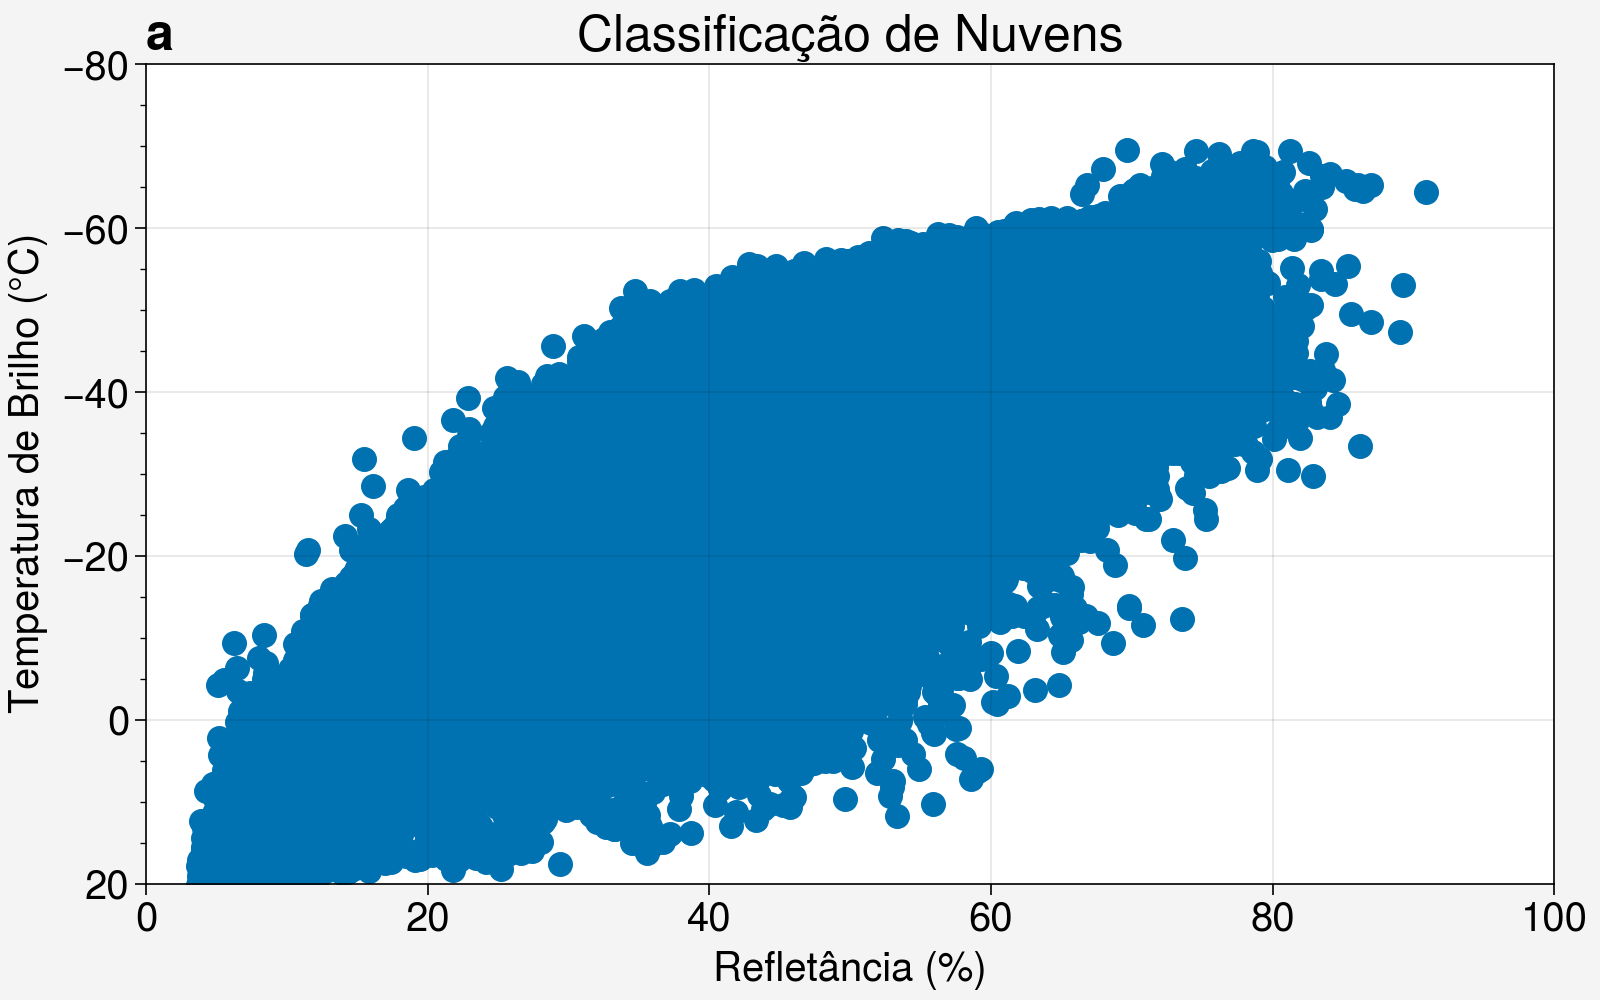

In [45]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8,5), tight=True)

# plota gráfico de linha
ax.scatter(df['refletancia'].values,
           df['temperatura'].values,
           lw=3,
           marker='o',
           label='pixel')

# formatação de eixos etc
ax.format(xlabel='Refletância (%)',
          ylabel='Temperatura de Brilho ($\degree$C)',
          title='Classificação de Nuvens',
          xtickminor=False,
          ytickminor=True,
          small='20px', large='25px',
          ylim=(20,-80), xlim=(0,100))

# salva figura
fig.save(f'{dir}output/Fig_3_dispersao_TxR.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

Como exercício iremos comparar a imagem gerada acima com os dados reais, e a imagem de referência abaixo. Comparando ambas imagens indique quais os tipos de nuvens que existem.

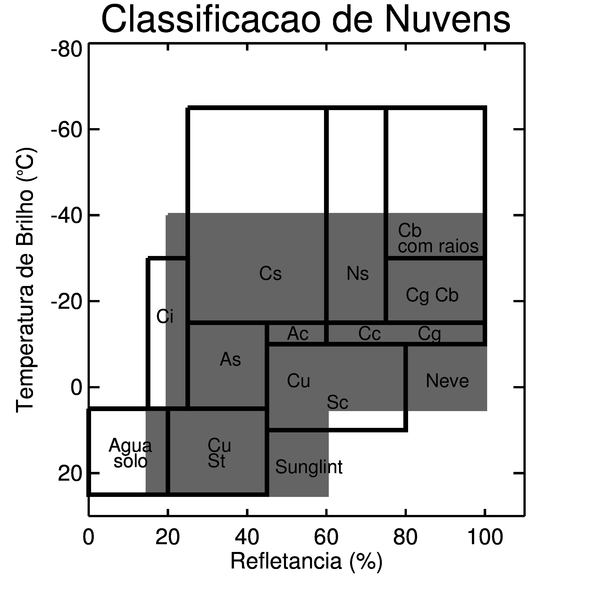